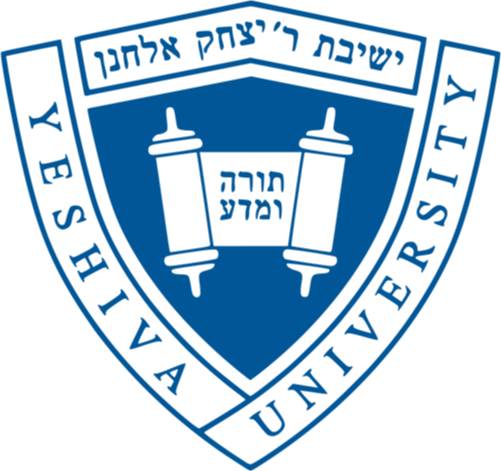

# <center>Katz School of Science and Health<br>AIM 5003 Numerical Methods<br><br>Project 1: Simulating a Robotic Arm</center>
<br><br>

### <center>Radek Jan Holik</center>
### <center>Sheng-Han Yueh</center>
### <center>Keesara Sharath Kumar Reddy  </center>

# <a name="Contents">Table of Contents</a>
- [1 Define the function f(θ) of the problem](#Section-1)
    - [1.1 Import the necessary libraries](#Section-11)
    - [1.2 Definition of function f(θ)](#Section-12)
    - [1.3 Test function f(θ)](#Section-13)
    <p>
- [2 Visualization](#Section-2)
    - [2.1 Visualization of the function f(θ](#Section-21)
        - [2.1.1 Plot of f(θ), θ ∈ [− π, π]](#Section-211)
    - [2.2 Visualization of the problem](#Section-22)
        - [2.2.1 Visualization of two poses](#Section-221)
    <p>
- [3 Finding poses for given parameters](#Section-3)
    - [3.1 Setting new parameters](#Section-31)
    - [3.2 Plot of function f(θ), θ ∈ [− π, π]](#Section-32)
    - [3.3 Intervals and points](#Section-33)
    - [3.4 Solvers](#Section-34)
        - [3.4.1 Definition of the Bisection Method](#Section-341)
        - [3.4.2 Definition of the Newton's Method](#Section-342)
    - [3.5 Solving the equation f(θ) = 0](#Section-35)
        - [3.5.1 Solution using the Bisection Method](#Section-351)
        - [3.5.2 Solution using the Newton’s Method](#Section-352)
    - [3.6 Searching for θ with a new value of p2](#Section-36)
        - [3.6.1 Changing the parameter p2 = 7](#Section-361)
        - [3.6.2 Plot of function f(θ), θ ∈ [− π, π]](#Section-362)
        - [3.6.3 New intervals and points](#Section-363)
        - [3.6.4 Solution using the Bisection Method](#Section-364)
        - [3.6.5 Solution using the Newton’s Method](#Section-365)
    - [3.7 Finding p2 with two poses](#Section-37)
        - [3.7.1 Interactive plot of f(θ) with changing p2](#Section-371)
        - [3.7.2 Solution using the Newton’s Method](#Section-372)
    - [3.8 Finding $p_2$ with 0, 2, 4, and 6 poses](#Section-38)
     <p> 
- [4 References](#Section-4)

# <a name="Section-1"> 1 Define the function $f(\theta)$ of the problem</a>
[top](#Contents)
### Description: 
We want to find the possible rotating angles in a 2D plan with three fixed struts. In the problem, we have to find the values for 𝜃, x, and y. We used the equation f(𝜃)=0 to find all possible roots, 𝜃. When we know the 𝜃, we can find x and y. As a result, we create a function that has only one argument 𝜃 and returns f(𝜃), x and y. After creating the function, we used two known roots of 𝜃 to test the function.

## <a name="Section-11">1.1 Import the necessary libraries</a>

In [70]:
# Python libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import timedelta
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

## <a name="Section-12">1.2 Definition of function $f(\theta)$</a>

### Description: 
In order to change the multiple combinations of parameters, we defined a class that includes setParamenters() and f() functions. We used setParameters() to define the constant values in f(). The function f() will have only one argument, θ. By finding the roots in equation f(𝜃)=0, we can find possible rotating angles. Therefore, we returned f(𝜃), denoted by f, in the function. Besides f(𝜃), we returned two unknown values, x and y.

In [71]:
# Function f(θ)

class Function:
   
    def __init__(self):
        '''
            A Constructor for defining object variables and their initial parameters.
        '''
        self.p1 = math.sqrt(5)
        self.p2 = math.sqrt(5)
        self.p3 = math.sqrt(5)
        self.L1 = 2
        self.L2 = math.sqrt(2)
        self.L3 = math.sqrt(2)
        self.gamma = math.pi / 2
        self.x1 = 4
        self.x2 = 0
        self.y2 = 4
        
    
    def setParameters(self, p1, p2, p3, L1, L2, L3, gamma, x1, x2, y2):
        '''
            A method allowing to set new parameters of function f(θ)
        '''
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3
        self.L1 = L1
        self.L2 = L2
        self.L3 = L3
        self.gamma = gamma
        self.x1 = x1
        self.x2 = x2
        self.y2 = y2
        
    def f(self, theta):
        '''
            Function f(θ) with
            one argument: θ
            and constants: p1, p2, p3, L1, L2, L3, γ, x1, x2, y2
        '''
        A2 = self.L3 * math.cos(theta) - self.x1
        B2 = self.L3 * math.sin(theta)
        A3 = self.L2 * ( math.cos(theta)*math.cos(self.gamma) - math.sin(theta)*math.sin(self.gamma) ) - self.x2
        B3 = self.L2 * ( math.cos(theta)*math.sin(self.gamma) + math.sin(theta)*math.cos(self.gamma) ) - self.y2
        
        internalMember_1 = math.pow(self.p2, 2) - math.pow(self.p1, 2) - math.pow(A2, 2) - math.pow(B2, 2)
        internalMember_2 = math.pow(self.p3, 2) - math.pow(self.p1, 2) - math.pow(A3, 2) - math.pow(B3, 2)
        
        N1 = B3 * internalMember_1 - B2 * internalMember_2
        N2 = - A3 * internalMember_1 + A2 * internalMember_2
        D = 2 * (A2 * B3 - B2 * A3)
        
        # The x, y coordinates of the position of A Stewart platform.
        x = N1 / D
        y = N2 / D

        f = math.pow(N1, 2) + math.pow(N2, 2) - math.pow(self.p1, 2) * math.pow(D, 2)
            
        # returns three numbers, the value of the function f(θ), and the position x, y
        return f, x, y

function = Function()

## <a name="Section-13">1.3 Test function $f(\theta)$</a>
The test is for $\theta = - \frac{\pi}{4} $ and $\theta = \frac{\pi}{4}$.

In [72]:
print(f"f(-π/4) = {function.f(- math.pi / 4)[0]}\n")
print(f"f(π/4) = {function.f( math.pi / 4)[0]}")

f(-π/4) = -4.547473508864641e-13

f(π/4) = -4.547473508864641e-13


# <a name="Section-2">2 Visualization</a>

## <a name="Section-21">2.1 Visualization of the function $f(\theta)$</a>
[top](#Contents)
### Description: 
This section will visual the function $f(\theta)$, where $\theta$ is from $-\pi$ to $\pi$. We generate 1000 points for $\theta$ as the x-axis and call the function $f(\theta)$ from section $1.2$ to calculate the values as y-axis. 

### <a name="Section-211">2.1.1 Plot of $f(\theta)$, $\theta \in [− \pi, \pi]$</a>
As a check of the right functionality, there should be roots at $\pm \pi / 4$.

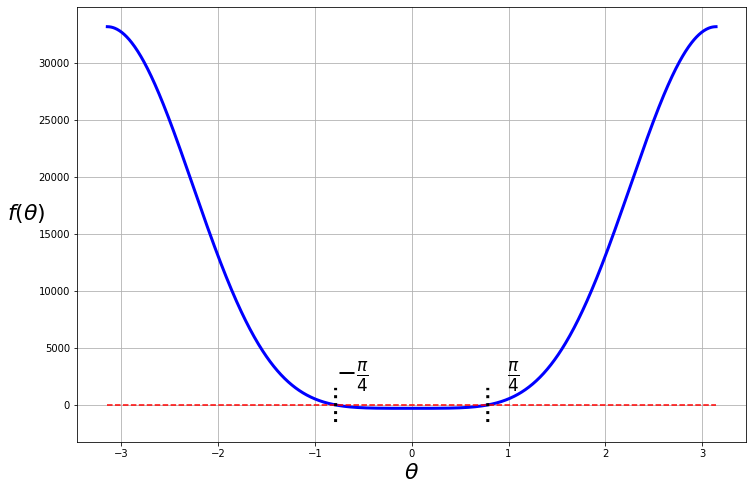

In [73]:
t = np.linspace(- math.pi, math.pi, 1000)
y = [function.f(x)[0] for x in t]
zero = [0.0 for x in t]
x_r1 = [-math.pi/4] * 3000
x_r2 = [ math.pi/4] * 3000

# Set up the figure for plotting
plt.figure(figsize=(12, 8))

plt.plot(t, y, color='blue', lw=3)
plt.plot(t, zero, '--', color='red')
plt.plot(x_r1, list(range(-1500, 1500)), ':', color='k', lw=3)
plt.plot(x_r2, list(range(-1500, 1500)), ':', color='k', lw=3)
plt.text(-math.pi/4, 2000,r'$-\frac{\pi}{4}$', fontsize=24)
plt.text( math.pi/4+0.2, 2000,r'$\frac{\pi}{4}$', fontsize=24)

plt.xlabel(r'$\theta$', fontsize=22)
plt.ylabel(r'$f(\theta$)   ', fontsize=22, rotation=0)
plt.grid()
plt.show()

### Detail for $f(\theta) \in [-500, 1000]$
A more detailed view of the function $f(\theta)$ around zero for a better understanding of the problem.

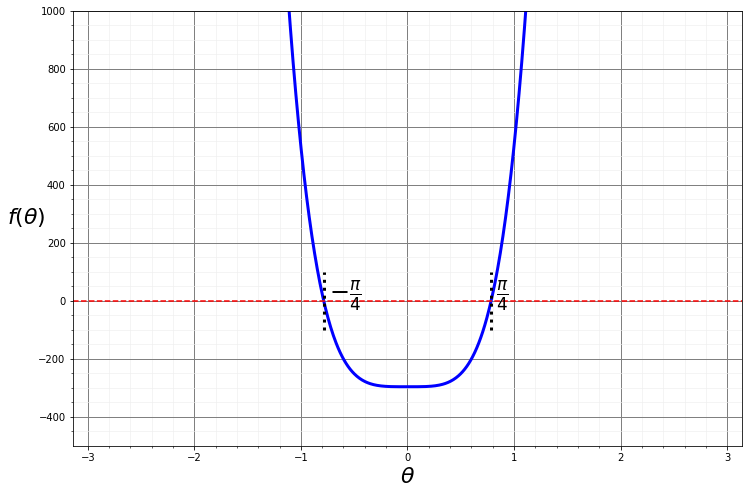

In [74]:
x_r1 = [-math.pi/4] * 200
x_r2 = [ math.pi/4] * 200

# Set up the size of the figure for plotting
plt.figure(figsize=(12, 8))

plt.plot(t, y, color='blue', lw=3)
plt.plot(t, zero, '--', color='red')

# Set the limits for the axis
plt.xlim([-math.pi, math.pi])
plt.ylim([-500, 1000])
plt.plot(x_r1, list(range(-100, 100)), ':', color='k', lw=3)
plt.plot(x_r2, list(range(-100, 100)), ':', color='k', lw=3)
plt.text(-math.pi/4 + 0.05, 0, r'$-\frac{\pi}{4}$', fontsize=24)
plt.text( math.pi/4 + 0.05, 0, r'$\frac{\pi}{4}$', fontsize=24)

plt.xlabel(r'$\theta$', fontsize=22)
plt.ylabel(r'$f(\theta$)   ', fontsize=22, rotation=0)
plt.grid(which='major', color='gray', linewidth=1.0)
plt.grid(which='minor', color='#EEEEEE', linewidth=0.6)
plt.minorticks_on()
# plt.grid()
plt.show()

## <a name="Section-22">2.2 Visualization of the problem</a>
[top](#Contents)
### Description:
With fixed length of the three struts, the triangle can rotate in several ways in a 2D plan. The problem is to find the possible rotating angle $\theta$.

### <a name="Section-221">2.2.1 Visualization of two poses</a>

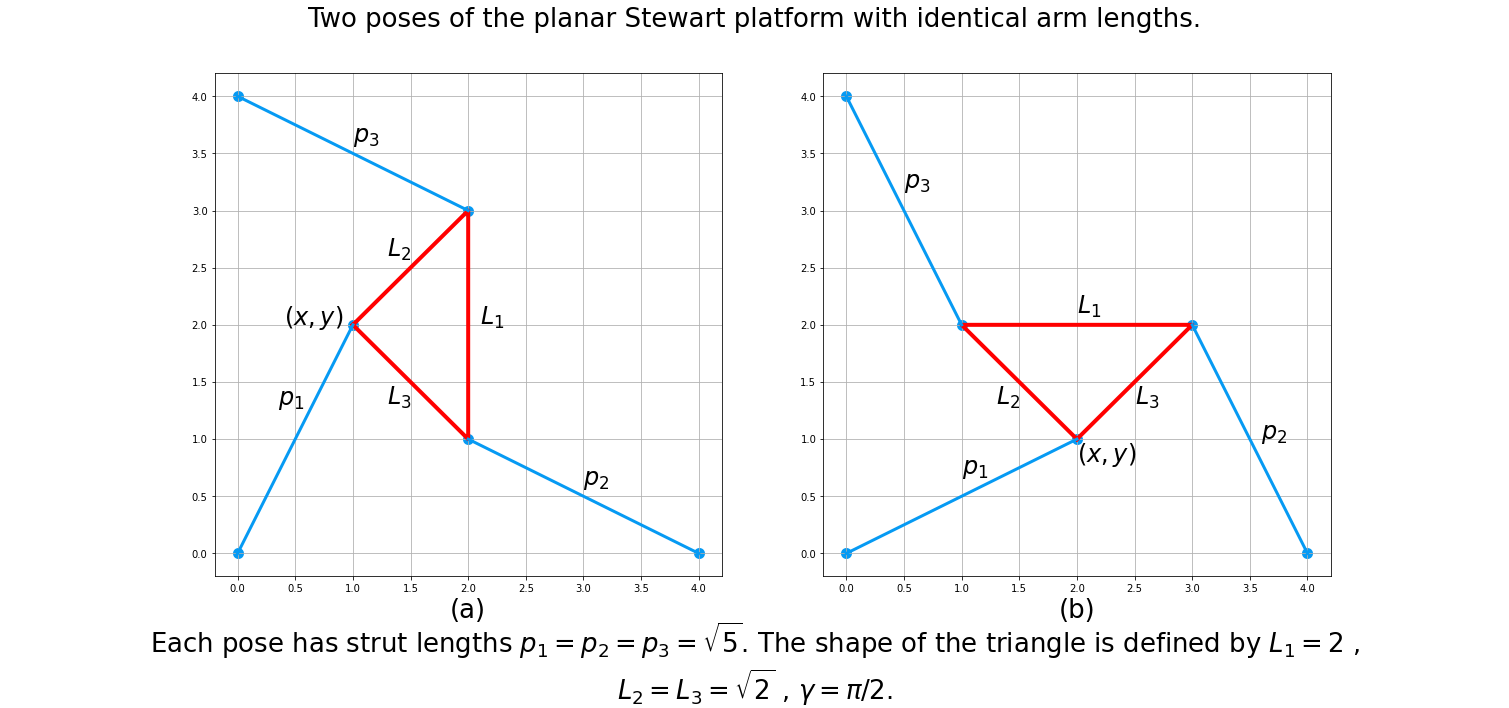

In [75]:
# Set up the size of the figure for plotting
plt.figure(figsize=(20, 9.25))


### Pose 1 ###

# Triangle
# X-axis values
pose1X = [1, 2, 2, 1]
  
# Y-axis values
pose1Y = [2, 1, 3, 2]

# Plot the triangle
plt.subplot(1, 2, 1)
plt.plot(pose1X ,pose1Y, color='red', lw=4)

# The strut anchor points
pose1AnchorX = [0, 4, 0, 1, 2, 2]
pose1AnchorY = [0, 0, 4, 2, 1, 3]

# Function to plot scatter
plt.subplot(1, 2, 1)
plt.scatter(pose1AnchorX, pose1AnchorY, color='#069AF3', lw=5)

# The struts points
# The strut p1
pose1Strut1X = [0, 1]
pose1Strut1Y = [0, 2]

plt.subplot(1, 2, 1)
plt.plot(pose1Strut1X, pose1Strut1Y, color='#069AF3', lw=3)

# The strut p2
pose1Strut2X = [4, 2]
pose1Strut2Y = [0, 1]

plt.subplot(1, 2, 1)
plt.plot(pose1Strut2X, pose1Strut2Y, color='#069AF3', lw=3)

# The strut p3
pose1Strut3X = [0, 2]
pose1Strut3Y = [4, 3]

# Text description of individual curves
plt.text(0.35, 1.3, r'$p_{1}$', fontsize=24)
plt.text(3.0, 0.6, r'$p_{2}$', fontsize=24)
plt.text(1.0, 3.6, r'$p_{3}$', fontsize=24)

plt.text(2.1, 2.0, r'$L_{1}$', fontsize=24)
plt.text(1.3, 2.6, r'$L_{2}$', fontsize=24)
plt.text(1.3, 1.3, r'$L_{3}$', fontsize=24)
plt.text(0.4, 2.0, r'$(x,y)$', fontsize=24)

plt.subplot(1, 2, 1)
plt.grid()
plt.xlabel('(a)', fontsize=26)
plt.plot(pose1Strut3X, pose1Strut3Y, color='#069AF3', lw=3)

##########################################

### Pose 2 ###

# Triangle
# X-axis values
pose2X = [2, 3, 1, 2]
  
# Y-axis values
pose2Y = [1, 2, 2, 1]

# Plot the triangle
plt.subplot(1, 2, 2)
plt.plot(pose2X ,pose2Y, color='red', lw=4)

# The strut anchor points
pose2AnchorX = [0, 4, 0, 2, 3, 1]
pose2AnchorY = [0, 0, 4, 1, 2, 2]

# Function to plot scatter
plt.subplot(1, 2, 2)
plt.scatter(pose2AnchorX, pose2AnchorY, color='#069AF3', lw=5)

# The struts points
# The strut p1
pose2Strut1X = [0, 2]
pose2Strut1Y = [0, 1]

plt.subplot(1, 2, 2)
plt.plot(pose2Strut1X, pose2Strut1Y, color='#069AF3', lw=3)

# The strut p2
pose2Strut2X = [4, 3]
pose2Strut2Y = [0, 2]

plt.subplot(1, 2, 2)
plt.plot(pose2Strut2X, pose2Strut2Y, color='#069AF3', lw=3)

# The strut p3
pose2Strut3X = [0, 1]
pose2Strut3Y = [4, 2]

# Text description of individual curves
plt.text(1.0, 0.7, r'$p_{1}$', fontsize=24)
plt.text(3.6, 1.0, r'$p_{2}$', fontsize=24)
plt.text(0.5, 3.2, r'$p_{3}$', fontsize=24)

plt.text(2.0, 2.1, r'$L_{1}$', fontsize=24)
plt.text(1.3, 1.3, r'$L_{2}$', fontsize=24)
plt.text(2.5, 1.3, r'$L_{3}$', fontsize=24)
plt.text(2.0, 0.8, r'$(x,y)$', fontsize=24)


plt.subplot(1, 2, 2)
plt.grid()
plt.xlabel('(b)', fontsize=26)
plt.plot(pose2Strut3X, pose2Strut3Y, color='#069AF3', lw=3)

plt.suptitle("Two poses of the planar Stewart platform with identical arm lengths.", fontsize=26)

txt=r"Each pose has strut lengths $p_1 = p_2 = p_3 = \sqrt{5}$. The shape of the triangle is defined by $L_1 = 2$ , $L_2 = L_3 = \sqrt{2}$ , $\gamma = \pi / 2$."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=26)
plt.show()


# <a name="Section-3">3 Finding poses for given parameters</a>
[top](#Contents)
### Description:
We create two methods to find $\theta$. Next, we are going to solve the forward kinematics problem for the planar Stewart platform specified by $x_1 = 5$, $(x_2, y_2) = (0, 6)$, $L_1 = L_3 = 3$, $L_2 = 3 \sqrt{2}$, $\gamma = \pi /4$, $p_1 = p_2 = 5$, $p_3 = 3$.

## <a name="Section-31">3.1 Setting new parameters</a>

In [76]:
# New parameters
function.setParameters(p1 = 5, p2 = 5, p3 = 3, L1 = 3, L2 = 3 * math.sqrt(2), L3 = 3, gamma = math.pi / 4, x1 = 5, x2 = 0, y2 = 6)

## <a name="Section-42">3.2 Plot of function $f(\theta)$, $\theta \in [-\pi, \pi]$</a>
### Description:
To know the possible number of roots, we visualized the function. The root is where $f(\theta) = 0$.

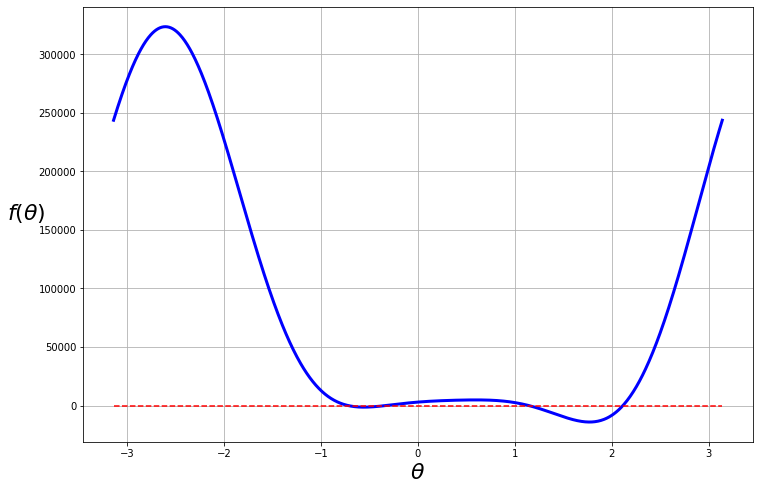

In [77]:
t = np.linspace(- math.pi, math.pi, 1000)
y = [function.f(x)[0] for x in t]
zero = [0.0 for x in t]

# Set up the figure for plotting
plt.figure(figsize=(12, 8))

plt.plot(t, y, color='blue', lw=3)
plt.plot(t, zero, '--', color='red')

plt.xlabel(r'$\theta$', fontsize=22)
plt.ylabel(r'$f(\theta$)   ', fontsize=22, rotation=0)
plt.grid()
plt.show()

### Detail around $f(\theta) \in [-5000, 5000]$
Similar to section [2.1.2](#Section-212), we will show the function $f(\theta)$ in greater detail.

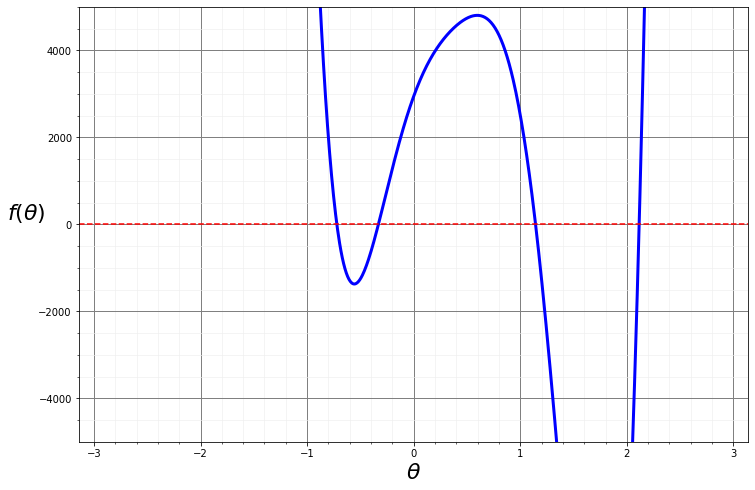

In [78]:
# Set up the size of the figure for plotting
plt.figure(figsize=(12, 8))

plt.plot(t, y, color='blue', lw=3)
plt.plot(t, zero, '--', color='red')

# Set the limits for the axis
plt.xlim([- math.pi, math.pi])
plt.ylim([-5000, 5000])

plt.xlabel(r'$\theta$', fontsize=22)
plt.ylabel(r'$f(\theta$)   ', fontsize=22, rotation=0)
plt.grid(which='major', color='gray', linewidth=1.0)
plt.grid(which='minor', color='#EEEEEE', linewidth=0.6)
plt.minorticks_on()
# plt.grid()
plt.show()

## <a name="Section-33">3.3 Intervals and points</a>
[top](#Contents)
### Description:
From $-\pi$ to $\pi$ we tested several intervals. For 6 intervals, the bisection method found only two roots, since the other four intervals all have the same sign at the endpoints. To find all roots, we used twice the number of intervals as the initial intervals in the bisection method. We assumed that the smaller the intervals we have, the greater the probability of finding all the roots. For the starting points of Newton's method, we used the midpoints of the 12 intervals.

In [79]:
endPoints = [- math.pi, math.pi]

numberIntervals = 12
delta = abs(endPoints[1] - endPoints[0]) / numberIntervals

intervals = []
points = []

x_i = endPoints[0]

for i in range(1, numberIntervals + 1):
    nextX_i = x_i + delta
    intervals.append([x_i, x_i + delta])
    points.append(sum(intervals[-1]) / 2)
    x_i = nextX_i 

print("Intervals:")
for interval in intervals: 
    print(f"[{round(interval[0], 5)}, {round(interval[1], 5)}]", end = ' ; ')
    
print("\n\nPoints:")
for point in points: 
    print(f"{round(point, 5)}", end = ' ; ')

Intervals:
[-3.14159, -2.61799] ; [-2.61799, -2.0944] ; [-2.0944, -1.5708] ; [-1.5708, -1.0472] ; [-1.0472, -0.5236] ; [-0.5236, -0.0] ; [-0.0, 0.5236] ; [0.5236, 1.0472] ; [1.0472, 1.5708] ; [1.5708, 2.0944] ; [2.0944, 2.61799] ; [2.61799, 3.14159] ; 

Points:
-2.87979 ; -2.35619 ; -1.8326 ; -1.309 ; -0.7854 ; -0.2618 ; 0.2618 ; 0.7854 ; 1.309 ; 1.8326 ; 2.35619 ; 2.87979 ; 

## <a name="Section-34">3.4 Solvers</a>
[top](#Contents)
### Description: 
We generate two methods to solve the problem.

### <a name="Section-341">3.4.1 Definition of the Bisection Method</a>

In [80]:
# A solution is correct within p decimal places if the error is less than 0.5 × 10^(−p)#
p = 8

def bisectionMethod(endPoints = [- math.pi, math.pi], f = function.f, TOL = 0.5 * math.pow(10,-p), maxIterations = 30): 
    '''
        The Bisection Method
        - Linear convergence,
        - Error is halved (S = 1/2)
    '''
    ai=[]
    bi=[]
    ci=[]
    iteration=[]
    f_a=[]
    f_b=[]
    f_c=[]
    a = endPoints[0]
    b = endPoints[1]
    n = 1
    
    # limit iterations to prevent infinite loop
    if f(a)[0] * f(b)[0] >= 0:
        # Method failed
        return None, n, 'With the same sign.'
    else:
        while n <= maxIterations:
            
            # new midpoint
            c = (a + b)/2
            
            ai.append(round(a, 6))
            bi.append(round(b, 6))
            ci.append(round(c, 6))
            iteration.append(n)
            f_a.append(round(f(a)[0], 6))
            f_b.append(round(f(b)[0], 6))
            f_c.append(round(f(c)[0], 6))
            
            if ( abs(f(c)[0]) <= TOL ) or ( (b - a)/2 < TOL):
                # Solution found: root, iterations
                break
            
            # new interval if satisfying f(a) * f(b) < 0. Then f has a root in [a; c]
            if f(a)[0] * f(c)[0] < 0:
                b = c
            else:
                a = c
                
            # increment step counter
            n += 1   
    
    if n == maxIterations:
        # Method failed
        return None, n, 'Over max iteration.'
    
    else:
        Data=pd.DataFrame(list(zip(iteration, ai, f_a, ci, f_c, bi, f_b)),
            columns =['i', 'ai', 'f(ai)','ci','f(ci)','bi','f(bi)'])
        return c, n, Data

### <a name="Section-342">3.4.2 Definition of the Newton's Method</a>

In [81]:
def numDer(x, f = function.f, h = 1e-7):
    '''
        Symmetric Derivative
    '''
    return (f(x + h)[0] - f(x - h)[0])/(2*h)

def newtonMethod(x0 = 0.0, f = function.f, TOL = 1e-8, maxIterations = 30):
    '''
        Newton's Method
        - Quadratic convergence
    '''
    original_x=[]
    next_x=[]
    iteration=[]
    f_x=[]
    f_x_1=[]
    n = 1
    while n <= maxIterations:
        
        # xᵢ+1 = xᵢ - f(xᵢ) / f'(xᵢ)
        x1 = x0 - f(x0)[0] / numDer(x0)
        original_x.append(round(x0, 6))
        next_x.append(round(x1, 6))
        f_x.append(round(f(x0)[0], 6))
        f_x_1.append(round(f(x1)[0], 6))
        iteration.append(n)
        
        if n == maxIterations:
        # Method failed
            return None, n, 'Over max iteration.'

        if (abs(f(x1)[0]) <= TOL) or (abs(x1 - x0) < TOL):
            # Solution found
            break
                   
        x0 = x1
        
        # increment step counter
        n += 1
            
    Data=pd.DataFrame(list(zip(iteration, original_x, next_x, f_x, f_x_1)),
            columns =['i', 'xi', 'xi+1','f(xi)','f(xi+1)'])
    return x1, n, Data

### Function Test of Numerical Derivative ("numDer")
Before moving on to the next section, it is important to review the essential part of Newton's method, i.e. numerical derivation.

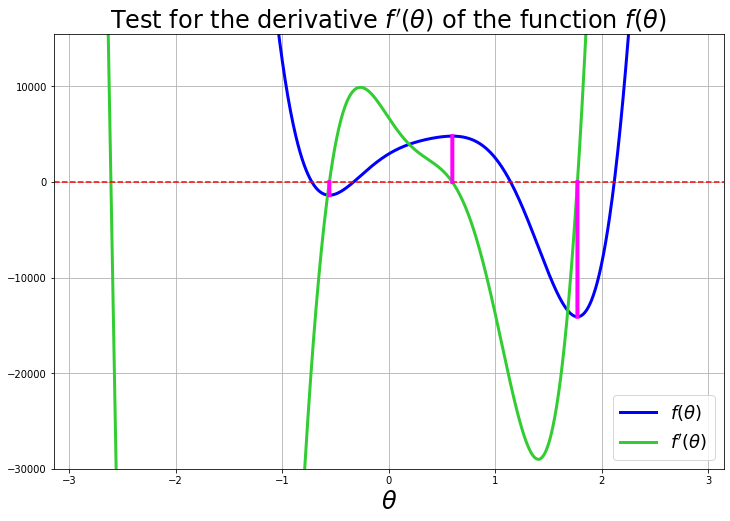

In [82]:
t = np.linspace(- math.pi, math.pi, 1000)
y = [function.f(x)[0] for x in t]
derY = [numDer(x) for x in t]
zero = [0.0 for x in t]

# Set up the size of the figure for plotting
plt.figure(figsize=(12, 8))

plt.plot(t, y, color='blue', lw=3, label=r"$f(\theta)$")
plt.plot(t, derY, color='limegreen', lw=3, label=r"$f'(\theta)$")
plt.plot(t, zero, '--', color='red')
plt.plot([-0.557060083489819]*1371, list(range(-1371, 0)), color='magenta', lw=4)
plt.plot([0.5966481097276746]*4806, list(range(0, 4806)), color='magenta', lw=4)
plt.plot([1.7704645067485236]*14091, list(range(-14091, 0)), color='magenta', lw=4)

# Set the limits for the axis
plt.xlim([-math.pi, math.pi])
plt.ylim([-30000, 15500])

plt.xlabel(r'$\theta$', fontsize=24)
plt.title(r"Test for the derivative $f'(\theta)$ of the function $f(\theta)$", fontsize=24) 
plt.legend(fontsize=18)
plt.grid()
plt.show()

## <a name="Section-35">3.5 Solving the equation $f(\theta) = 0$</a>
[top](#Contents)
### Description:
This section uses the methods above to solve the equation $f(\theta) = 0$. This equation should have four roots corresponding to four terms. The results from the mentioned methods will be compared with each other.

### <a name="Section-351">3.5.1 Solution using the Bisection Method</a>

In [83]:
print(f"Bisection Method:")
bisecMetRoots = [[],[]]

starting_time = time.time()
for idx, interval in enumerate(intervals):
    xr, n, res = bisectionMethod(interval)
    print()
    print(f"Interval #{idx + 1} : [{round(interval[0], 6)}, {round(interval[1], 6)}]")
    print(res)
    
    if xr != None:
        print()
        print(f"xᵣ = {round(xr, 6)}")
        print(f"f(xᵣ) = {round(function.f(xr)[0], 6)}")
        print(f"Number of iterations = {n}")
        print()
        
        # The roots are stored in the "bisecMetRoots" list
        if len(bisecMetRoots[0]) == 0:
            bisecMetRoots[0].append(xr)
            bisecMetRoots[1].append(n)
        else:
            # If the root is already occupied, it will not be saved again
            if abs(bisecMetRoots[0][-1] - xr) >= 1e-8:
                            bisecMetRoots[0].append(xr)
                            bisecMetRoots[1].append(n)
    else:
        print("No root found.")

print(f'\nExecution time: {timedelta(seconds = time.time() - starting_time)} [hh:mm:ss]')

Bisection Method:

Interval #1 : [-3.141593, -2.617994]
With the same sign.
No root found.

Interval #2 : [-2.617994, -2.094395]
With the same sign.
No root found.

Interval #3 : [-2.094395, -1.570796]
With the same sign.
No root found.

Interval #4 : [-1.570796, -1.047198]
With the same sign.
No root found.

Interval #5 : [-1.047198, -0.523599]
     i        ai         f(ai)        ci        f(ci)        bi        f(bi)
0    1 -1.047198  16790.851794 -0.785398  1540.787899 -0.523599 -1328.901648
1    2 -0.785398   1540.787899 -0.654498  -930.851566 -0.523599 -1328.901648
2    3 -0.785398   1540.787899 -0.719948   -16.773665 -0.654498  -930.851566
3    4 -0.785398   1540.787899 -0.752673   673.429379 -0.719948   -16.773665
4    5 -0.752673    673.429379 -0.736311   307.209552 -0.719948   -16.773665
5    6 -0.736311    307.209552 -0.728130   140.066104 -0.719948   -16.773665
6    7 -0.728130    140.066104 -0.724039    60.374183 -0.719948   -16.773665
7    8 -0.724039     60.374183 -0.72

### Found roots

In [84]:
# bisecMetRoots[0] = root
# bisecMetRoots[1] = number of iterations
print("Roots:")
for idx, r in enumerate(sorted(bisecMetRoots[0])):
    print(f"x{idx + 1} = {round(r, 9)}", end = '  ')
    print(f'f(x{idx+1}) = ','%.3e' % function.f(r)[0], end = '  ')
    print('backward error = ','%.3e' % abs(function.f(r)[0]),end = '  ')
    print('x = ',round(function.f(r)[1],8), end = '  ')
    print('y = ',round(function.f(r)[2],8), end = '  ')
    print()

Roots:
x1 = -0.720849205  f(x1) =  6.488e-06  backward error =  6.488e-06  x =  -1.37837963  y =  4.80625318  
x2 = -0.331005185  f(x2) =  -9.149e-06  backward error =  9.149e-06  x =  -0.91470872  y =  4.91561878  
x3 = 1.143685515  f(x3) =  6.689e-05  backward error =  6.689e-05  x =  4.48175007  y =  2.21673553  
x4 = 2.115909014  f(x4) =  -4.135e-05  backward error =  4.135e-05  x =  4.57183018  y =  2.02444285  


### <a name="Section-352">3.5.2 Solution using the Newton’s Method</a>

In [85]:
print(f"Newton's Method:\n")
newtonMetRoots = [[],[]]

starting_time = time.time()
for idx, point in enumerate(points):
    xr, n, res= newtonMethod(point)
    print(f"Point #{idx+1} , x0 = {round(point, 6)}")
    print(res)
    
    if xr != None:
        print()
        print(f"xᵣ = {round(xr, 6)}")
        print(f"f(xᵣ) = {round(function.f(xr)[0], 6)}")
        print(f"Number of iterations = {n}")
        print()
        
        # The root is not stored if it is outside the interval -pi to pi
        if xr >= - math.pi and xr <= math.pi:
            if len(newtonMetRoots[0]) == 0:
                newtonMetRoots[0].append(xr)
                newtonMetRoots[1].append(n)
            else:
                trueList = [False for i in range(len(newtonMetRoots[0]))]
                
                # If the root is already occupied, it will store the value with smallest f(xr) 
                for i, value in enumerate(newtonMetRoots[0]):
                    if abs(value - xr) >= 1e-8:
                        trueList[i] = True
                    elif abs(value - xr) < 1e-8 and abs(function.f(xr)[0])<abs(function.f(value)[0]):
                        newtonMetRoots[0][i]=xr
                        newtonMetRoots[1][i]=n
                
                # The new root must not be the same as one of the previous roots
                if all(n for n in trueList) == True: 
                    newtonMetRoots[0].append(xr)
                    newtonMetRoots[1].append(n)
    else:
        print("No root found.")
    
    #print(idx,newtonMetRoots)

print(f'\nExecution time: {timedelta(seconds = time.time() - starting_time)} [hh:mm:ss]')

Newton's Method:

Point #1 , x0 = -2.879793
   i        xi      xi+1          f(xi)       f(xi+1)
0  1 -2.879793 -4.760411  301236.050497 -10150.175440
1  2 -4.760411 -5.144146  -10150.175440     97.709684
2  3 -5.144146 -5.139474      97.709684     -0.537775
3  4 -5.139474 -5.139500      -0.537775     -0.000016
4  5 -5.139500 -5.139500      -0.000016      0.000000

xᵣ = -5.1395
f(xᵣ) = 0.0
Number of iterations = 5

Point #2 , x0 = -2.356194
   i        xi      xi+1          f(xi)     f(xi+1)
0  1 -2.356194 -0.260164  304871.421450  694.799473
1  2 -0.260164 -0.330272     694.799473    7.011759
2  3 -0.330272 -0.331005       7.011759    0.003102
3  4 -0.331005 -0.331005       0.003102    0.000000

xᵣ = -0.331005
f(xᵣ) = 0.0
Number of iterations = 4

Point #3 , x0 = -1.832596
   i        xi      xi+1          f(xi)       f(xi+1)
0  1 -1.832596 -1.204162  179581.681024  34994.996948
1  2 -1.204162 -0.955741   34994.996948   9550.770560
2  3 -0.955741 -0.812874    9550.770560   2417.87100

### Found roots

In [86]:
# newtonMetRoots[0] = root
# newtonMetRoots[1] = number of iterations
print("Roots:")
for idx, r in enumerate(sorted(newtonMetRoots[0])):
    print(f"x{idx + 1} = {round(r, 9)}", end = '  ')
    print(f'f(x{idx+1}) = ','%.3e' % function.f(r)[0], end = '  ')
    print('backward error = ','%.3e' % abs(function.f(r)[0]),end = '  ')
    print('x = ',round(function.f(r)[1],8), end = '  ')
    print('y = ',round(function.f(r)[2],8), end = '  ')
    print()

Roots:
x1 = -0.720849204  f(x1) =  7.276e-12  backward error =  7.276e-12  x =  -1.37837963  y =  4.80625318  
x2 = -0.331005184  f(x2) =  6.039e-10  backward error =  6.039e-10  x =  -0.91470872  y =  4.91561878  
x3 = 1.143685518  f(x3) =  -4.584e-10  backward error =  4.584e-10  x =  4.48175007  y =  2.21673552  
x4 = 2.115909014  f(x4) =  0.000e+00  backward error =  0.000e+00  x =  4.57183018  y =  2.02444285  


## <a name="Section-36">3.6 Searching for $\theta$ with a new value of $p_2$</a>
[top](#Contents)
### Description:
At the beginning of this section, the parameter $p_2$ is changed to the value $7$, then the function $f(\theta)$ is plotted and the roots of the angle $\theta$, respectively the new poses, are found.

### <a name="Section-361">3.6.1 Changing the parameter $p_2 = 7$</a>

In [87]:
# New parameter p2 = 7
function.setParameters(p1 = 5, p2 = 7, p3 = 3, L1 = 3, L2 = 3 * math.sqrt(2), L3 = 3, gamma = math.pi / 4, x1 = 5, x2 = 0, y2 = 6)

### <a name="Section-362">3.6.2 Plot of function $f(\theta)$, $\theta \in [-\pi, \pi]$</a>
### Description:
Same as in section [3.2](#Section-32), to know the possible number of roots, we visualized the function. The root is where $f(\theta) = 0$.

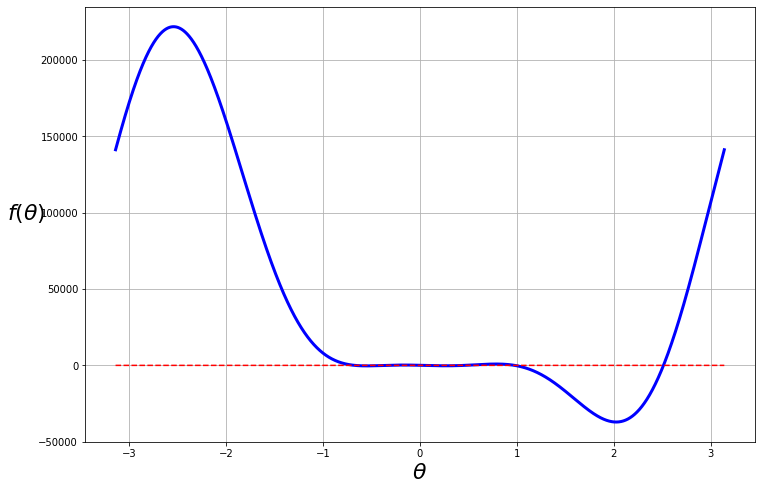

In [88]:
t = np.linspace(- math.pi, math.pi, 10000)
y = [function.f(x)[0] for x in t]
zero = [0.0 for x in t]

# Set up the figure for plotting
plt.figure(figsize=(12, 8))

plt.plot(t, y, color='blue', lw=3)
plt.plot(t, zero, '--', color='red')

plt.xlabel(r'$\theta$', fontsize=22)
plt.ylabel(r'$f(\theta$)   ', fontsize=22, rotation=0)
plt.grid()
plt.show()

### Detail around $f(\theta) \in [-2000, 2000]$
Similar to section [2.1.1](#Section-211), we will show the function $f(\theta)$ in greater detail.

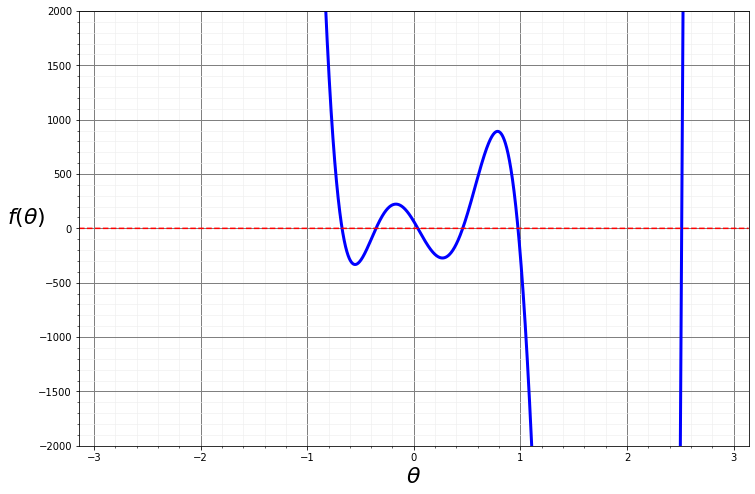

In [89]:
# Set up the size of the figure for plotting
plt.figure(figsize=(12, 8))

plt.plot(t, y, color='blue', lw=3)
plt.plot(t, zero, '--', color='red')

# Set the limits for the axis
plt.xlim([- math.pi, math.pi])
plt.ylim([-2000, 2000])

plt.xlabel(r'$\theta$', fontsize=22, rotation=0)
plt.ylabel(r'$f(\theta$)   ', fontsize=22, rotation=0)
plt.grid(which='major', color='gray', linewidth=1.0)
plt.grid(which='minor', color='#EEEEEE', linewidth=0.6)
plt.minorticks_on()
# plt.grid()
plt.show()

### <a name="Secction-363">3.6.3 New intervals and points</a>
### Description:
Same as in section [3.3](#Section-33), we divide the given interval $[-\pi, \pi]$ into twenty four intervals of the same size. We take the middle number from these twenty four intervals again. This gives us twenty four new points.This increase in the number of intervals or points is due to the larger number of roots. If the number of intervals remained at the previous value, it would happen that some roots might not be found.

In [90]:
endPoints = [- math.pi, math.pi]

numberIntervals = 24
delta = abs(endPoints[1] - endPoints[0]) / numberIntervals
# print(delta)

intervals = []
points = []

x_i = endPoints[0]

for i in range(1, numberIntervals + 1):
    nextX_i = x_i + delta
    intervals.append([x_i, x_i + delta])
    points.append(sum(intervals[-1]) / 2)
    x_i = nextX_i 

print("Intervals:")
for interval in intervals: 
    print(f"[{round(interval[0], 5)}, {round(interval[1], 5)}]", end = ' ; ')
    
print("\n\nPoints:")
for point in points: 
    print(f"{round(point, 5)}", end = ' ; ')

Intervals:
[-3.14159, -2.87979] ; [-2.87979, -2.61799] ; [-2.61799, -2.35619] ; [-2.35619, -2.0944] ; [-2.0944, -1.8326] ; [-1.8326, -1.5708] ; [-1.5708, -1.309] ; [-1.309, -1.0472] ; [-1.0472, -0.7854] ; [-0.7854, -0.5236] ; [-0.5236, -0.2618] ; [-0.2618, 0.0] ; [0.0, 0.2618] ; [0.2618, 0.5236] ; [0.5236, 0.7854] ; [0.7854, 1.0472] ; [1.0472, 1.309] ; [1.309, 1.5708] ; [1.5708, 1.8326] ; [1.8326, 2.0944] ; [2.0944, 2.35619] ; [2.35619, 2.61799] ; [2.61799, 2.87979] ; [2.87979, 3.14159] ; 

Points:
-3.01069 ; -2.74889 ; -2.48709 ; -2.22529 ; -1.9635 ; -1.7017 ; -1.4399 ; -1.1781 ; -0.9163 ; -0.6545 ; -0.3927 ; -0.1309 ; 0.1309 ; 0.3927 ; 0.6545 ; 0.9163 ; 1.1781 ; 1.4399 ; 1.7017 ; 1.9635 ; 2.22529 ; 2.48709 ; 2.74889 ; 3.01069 ; 

### <a name="Section-365">3.6.4 Solution using the Bisection Method</a>

In [91]:
print(f"Bisection Method:")
bisecMetRoots = [[],[]]

starting_time = time.time()
for idx, interval in enumerate(intervals):
    xr, n, res = bisectionMethod(interval)
    print()
    print(f"Interval #{idx + 1} : [{round(interval[0], 6)}, {round(interval[1], 6)}]")
    print(res)
    
    if xr != None:
        print()
        print(f"xᵣ = {round(xr, 6)}")
        print(f"f(xᵣ) = {round(function.f(xr)[0], 6)}")
        print(f"Number of iterations = {n}")
        print()
        
        # The roots are stored in the "bisecMetRoots" list
        if len(bisecMetRoots[0]) == 0:
            bisecMetRoots[0].append(xr)
            bisecMetRoots[1].append(n)
        else:
            # If the root is already occupied, it will not be saved again
            if abs(bisecMetRoots[0][-1] - xr) >= 1e-8:
                            bisecMetRoots[0].append(xr)
                            bisecMetRoots[1].append(n)
    else:
        print("No root found.")

print(f'\nExecution time: {timedelta(seconds = time.time() - starting_time)} [hh:mm:ss]')

Bisection Method:

Interval #1 : [-3.141593, -2.879793]
With the same sign.
No root found.

Interval #2 : [-2.879793, -2.617994]
With the same sign.
No root found.

Interval #3 : [-2.617994, -2.356194]
With the same sign.
No root found.

Interval #4 : [-2.356194, -2.094395]
With the same sign.
No root found.

Interval #5 : [-2.094395, -1.832596]
With the same sign.
No root found.

Interval #6 : [-1.832596, -1.570796]
With the same sign.
No root found.

Interval #7 : [-1.570796, -1.308997]
With the same sign.
No root found.

Interval #8 : [-1.308997, -1.047198]
With the same sign.
No root found.

Interval #9 : [-1.047198, -0.785398]
With the same sign.
No root found.

Interval #10 : [-0.785398, -0.523599]
     i        ai        f(ai)        ci       f(ci)        bi       f(bi)
0    1 -0.785398  1230.865787 -0.654498 -104.151099 -0.523599 -321.100544
1    2 -0.785398  1230.865787 -0.719948  374.911310 -0.654498 -104.151099
2    3 -0.719948   374.911310 -0.687223   94.714627 -0.654498 -1

### Found roots

In [92]:
print("Roots:")
for idx, r in enumerate(sorted(bisecMetRoots[0])):
    print(f"x{idx + 1} = {round(r, 9)}", end = '  ')
    print(f'f(x{idx+1}) = ','%.3e' % function.f(r)[0], end = '  ')
    print('backward error = ','%.3e' % abs(function.f(r)[0]),end = '  ')
    print('x = ',round(function.f(r)[1],8), end = '  ')
    print('y = ',round(function.f(r)[2],8), end = '  ')
    print()

Roots:
x1 = -0.67315749  f(x1) =  2.417e-05  backward error =  2.417e-05  x =  -4.31475959  y =  2.52643022  
x2 = -0.35474027  f(x2) =  1.194e-07  backward error =  1.194e-07  x =  -4.80489652  y =  1.38310138  
x3 = 0.037766759  f(x3) =  1.951e-06  backward error =  1.951e-06  x =  -4.94902462  y =  0.7121484  
x4 = 0.458878184  f(x4) =  6.995e-06  backward error =  6.995e-06  x =  -0.81980013  y =  4.93233494  
x5 = 0.977672892  f(x5) =  2.908e-05  backward error =  2.908e-05  x =  2.3035541  y =  4.43775153  
x6 = 2.513852801  f(x6) =  2.612e-04  backward error =  2.612e-04  x =  3.21569604  y =  3.8287464  


### <a name="Section-365">3.6.5 Solution using the Newton’s Method</a>

In [93]:
print(f"Newton's Method:\n")
newtonMetRoots = [[],[]]

starting_time = time.time()
for idx, point in enumerate(points):
    xr, n, res = newtonMethod(point)
    print(f"Point #{idx+1} , x0 = {round(point, 6)}")
    print(res)
    
    if xr != None:
        print()
        print(f"xᵣ = {round(xr, 6)}")
        print(f"f(xᵣ) = {round(function.f(xr)[0], 6)}")
        print(f"Number of iterations = {n}")
        print()
        
        
        # The root is not stored if it is outside the interval -pi to pi
        if xr >= - math.pi and xr <= math.pi:
        
            if len(newtonMetRoots[0]) == 0:
                    newtonMetRoots[0].append(xr)
                    newtonMetRoots[1].append(n)
            else:
                # The root is not stored if it is outside the interval -pi to pi
                trueList = [False for i in range(len(newtonMetRoots[0]))]
                
                # If the root is already occupied, it will store the value with smallest f(xr) 
                for i, value in enumerate(newtonMetRoots[0]):
                    if abs(value - xr) >= 1e-8:
                        trueList[i] = True
                    elif abs(value - xr) < 1e-8 and abs(function.f(xr)[0])<abs(function.f(value)[0]):
                        newtonMetRoots[0][i]=xr
                        newtonMetRoots[1][i]=n
                
                # The new root must not be the same as one of the previous roots
                if all(n for n in trueList) == True: 
                    newtonMetRoots[0].append(xr)
                    newtonMetRoots[1].append(n)
    else:
        print("No root found.")
    

print(f'\nExecution time: {timedelta(seconds = time.time() - starting_time)} [hh:mm:ss]')

Newton's Method:

Point #1 , x0 = -3.010693
   i        xi      xi+1          f(xi)       f(xi+1)
0  1 -3.010693 -3.842207  170170.895262 -10710.089697
1  2 -3.842207 -3.762489  -10710.089697   1098.601213
2  3 -3.762489 -3.769284    1098.601213      7.693546
3  4 -3.769284 -3.769333       7.693546      0.000390
4  5 -3.769333 -3.769333       0.000390      0.000000

xᵣ = -3.769333
f(xᵣ) = 0.0
Number of iterations = 5

Point #2 , x0 = -2.748894
   i        xi      xi+1          f(xi)       f(xi+1)
0  1 -2.748894 -4.832863  211220.782618 -14382.697606
1  2 -4.832863 -5.126050  -14382.697606  -3179.602922
2  3 -5.126050 -5.250687   -3179.602922   -688.268203
3  4 -5.250687 -5.297541    -688.268203    -85.945835
4  5 -5.297541 -5.305302     -85.945835     -2.205423
5  6 -5.305302 -5.305512      -2.205423     -0.001595
6  7 -5.305512 -5.305512      -0.001595     -0.000000

xᵣ = -5.305512
f(xᵣ) = -0.0
Number of iterations = 7

Point #3 , x0 = -2.487094
   i        xi      xi+1          f(xi)

### Found roots

In [94]:
# newtonMetRoots[0] = root
# newtonMetRoots[1] = number of iterations
print("Roots:")
for idx, r in enumerate(sorted(newtonMetRoots[0])):
    print(f"x{idx + 1} = {round(r, 9)}", end = '  ')
    print(f'f(x{idx+1}) = ','%.3e' % function.f(r)[0], end = '  ')
    print('backward error = ','%.3e' % abs(function.f(r)[0]),end = '  ')
    print('x = ',round(function.f(r)[1],8), end = '  ')
    print('y = ',round(function.f(r)[2],8), end = '  ')
    print()

Roots:
x1 = -0.673157486  f(x1) =  0.000e+00  backward error =  0.000e+00  x =  -4.3147596  y =  2.52643021  
x2 = -0.35474027  f(x2) =  -1.193e-09  backward error =  1.193e-09  x =  -4.80489652  y =  1.38310138  
x3 = 0.037766761  f(x3) =  -1.364e-12  backward error =  1.364e-12  x =  -4.94902462  y =  0.7121484  
x4 = 0.458878181  f(x4) =  1.194e-09  backward error =  1.194e-09  x =  -0.81980017  y =  4.93233491  
x5 = 0.977672895  f(x5) =  1.819e-12  backward error =  1.819e-12  x =  2.3035541  y =  4.43775152  
x6 = 2.513852799  f(x6) =  -5.821e-11  backward error =  5.821e-11  x =  3.21569604  y =  3.8287464  


## <a name="Section-37">3.7 Finding $p_2$ with two poses</a>
[top](#Contents)
### Description: 
We change the $p_2$ value and find the roots several of times to find the value of $p_2$ that only has two roots.

### <a name = "Section-371">3.7.1 Interactive plot of  $f(\theta)$ with changing $p_2$</a>
For quick orientation in the task, the following interactive graph with changing parameter $p_2$ is used. We can very quickly find the approximate values of $p_2$, where the function $f(\theta)$ has only two roots.

In [95]:
def plot_func(P2):
    t = np.linspace(- math.pi, math.pi, 1000)
    # parameter p2 can change from 0.01 to 10.00 with the step 0.01
    function.setParameters(p1 = 5, p2 = P2, p3 = 3, L1 = 3, L2 = 3 * math.sqrt(2), L3 = 3, gamma = math.pi / 4, x1 = 5, x2 = 0, y2 = 6)
    y = [function.f(x)[0] for x in t]
    zero = [0.0 for x in t]
    
    # Set up the figure for plotting
    plt.figure(figsize=(12, 8))
    
    plt.plot(t, y, color='blue', lw=3)
    plt.plot(t, zero, '--', color='red')
    
    # Set the limits for the axis
    plt.xlim([- math.pi, math.pi])
    plt.ylim([-15000, 15000])
    
    plt.xlabel(r'$\theta$', fontsize=22)
    plt.ylabel(r'$f(\theta$)   ', fontsize=22, rotation=0)
    plt.grid(which='major', color='gray', linewidth=1.0)
    plt.grid(which='minor', color='#EEEEEE', linewidth=0.6)
    plt.minorticks_on()
    # plt.grid()

# interact(plot_func, P2 = widgets.FloatSlider(value=5.0, min=0.00, max=10.0, step=0.01))
P2 = widgets.FloatSlider(value=5.0, min=0.00, max=20, step=0.01,visible=True, description='p2:')
widgets.interact(plot_func,P2=P2)

interactive(children=(FloatSlider(value=5.0, description='p2:', max=20.0, step=0.01), Output()), _dom_classes=…

<function __main__.plot_func(P2)>

### <a name="Section-372">3.7.2 Solution using the Newton’s Method</a>

In [96]:
print(f"Newton's Method:\n")

starting_time = time.time()

P2 = 0.00
start=P2
stop=P2
last_len=None
intervalZero=[]
intervalTwo=[]
intervalFour=[]
intervalSix=[]


while P2 <= 10.00:
    newtonMetRoots = [[],[]]
    
    # New parameter p2
    function.setParameters(p1 = 5, p2 = P2, p3 = 3, L1 = 3, L2 = 3 * math.sqrt(2), L3 = 3, gamma = math.pi / 4, x1 = 5, x2 = 0, y2 = 6)
    
    # print(f"p2 = {P2}")
    for idx, point in enumerate(points):
        xr, n, res = newtonMethod(point, maxIterations = 30)
        
        if xr != None:
            
            # The root is not stored if it is outside the interval -pi to pi
            if xr >= - math.pi and xr <= math.pi:
                
                if len(newtonMetRoots[0]) == 0:
                    newtonMetRoots[0].append(xr)
                    newtonMetRoots[1].append(n)

                else:
                    trueList = [False for i in range(len(newtonMetRoots[0]))]
                    
                    # If the root is alreadly occupied, it will store the value with smallest f(xr) 
                    for i, value in enumerate(newtonMetRoots[0]):
                        if abs(value - xr) >= 1e-8:
                            trueList[i] = True
                        elif abs(value - xr) < 1e-8 and abs(function.f(xr)[0]) < abs(function.f(value)[0]):
                            newtonMetRoots[0][i] = xr
                            newtonMetRoots[1][i] = n
                    
                    # The new root must not be the same as one of the previous roots
                    if all(n for n in trueList) == True: 
                        newtonMetRoots[0].append(xr)
                        newtonMetRoots[1].append(n)
    
    if last_len == len(newtonMetRoots[0]):
        stop = P2
        #print(stop)
    if last_len != len(newtonMetRoots[0]) or abs(P2-10.00) <= 1e-3:
        # print(last_len,start,stop)
        if last_len == 2:
            intervalTwo.append([start,stop])  
         
        start=P2 
    
    last_len = len(newtonMetRoots[0])
        
    P2 += 0.01

print(f'\nExecution time: {timedelta(seconds = time.time() - starting_time)} [hh:mm:ss]')

Newton's Method:


Execution time: 0:00:13.151470 [hh:mm:ss]


### Intervals of $p_2$ with two roots/poses

In [97]:
#intervalTwo
for i in intervalTwo:
    print(f"p2 ∈ [{round(i[0], 6)}, {round(i[1], 6)}]")

p2 ∈ [3.72, 4.86]
p2 ∈ [7.85, 9.26]


## <a name="Section-38">3.8 Finding $p_2$ with 0, 2, 4, and 6 poses</a>
### Description:
By generating several $p_2$ values with $0.01$ between them, we find the number of roots for each $p_2$ value.

In [98]:
print(f"Newton's Method:\n")
starting_time = time.time()

P2 = 0.00
start=P2
stop=P2
last_len=None
intervalZero=[]
intervalTwo=[]
intervalFour=[]
intervalSix=[]


while P2 <= 10.00:
    newtonMetRoots = [[],[]]
    
    # New parameter p2
    function.setParameters(p1 = 5, p2 = P2, p3 = 3, L1 = 3, L2 = 3 * math.sqrt(2), L3 = 3, gamma = math.pi / 4, x1 = 5, x2 = 0, y2 = 6)
    
    # print(f"p2 = {P2}")
    for idx, point in enumerate(points):
        xr, n, res = newtonMethod(point, maxIterations = 30)
        
        if xr != None:
            
            # The root is not stored if it is outside the interval -pi to pi
            if xr >= - math.pi and xr <= math.pi:
                
                if len(newtonMetRoots[0]) == 0:
                    newtonMetRoots[0].append(xr)
                    newtonMetRoots[1].append(n)

                else:
                    trueList = [False for i in range(len(newtonMetRoots[0]))]
                    
                    # If the root is alreadly occupied, it will store the value with smallest f(xr) 
                    for i, value in enumerate(newtonMetRoots[0]):
                        if abs(value - xr) >= 1e-8:
                            trueList[i] = True
                        elif abs(value - xr) < 1e-8 and abs(function.f(xr)[0]) < abs(function.f(value)[0]):
                            newtonMetRoots[0][i] = xr
                            newtonMetRoots[1][i] = n
                    
                    # The new root must not be the same as one of the previous roots
                    if all(n for n in trueList) == True: 
                        newtonMetRoots[0].append(xr)
                        newtonMetRoots[1].append(n)
    
    if last_len == len(newtonMetRoots[0]):
        stop = P2
        #print(stop)
    if last_len != len(newtonMetRoots[0]) or abs(P2-10.00) <= 1e-3:
        # print(last_len,start,stop)
        if last_len == 0:
            intervalZero.append([start,stop]) 
            #print(r0_result)
        if last_len == 2:
            intervalTwo.append([start,stop])  
        if last_len == 4:
            intervalFour.append([start,stop])
        if last_len == 6:
            intervalSix.append([start,stop])           
        start=P2 
    
    last_len = len(newtonMetRoots[0])
        
    P2 += 0.01

print(f'\nExecution time: {timedelta(seconds = time.time() - starting_time)} [hh:mm:ss]')

Newton's Method:


Execution time: 0:00:13.097941 [hh:mm:ss]


In [99]:
# intervalZero
print("Zero roots:")
for i in intervalZero:
    print(f"p2 ∈ [{round(i[0], 6)}, {round(i[1], 6)}]")

# intervalTwo
print("\nTwo roots:")
for i in intervalTwo:
    print(f"p2 ∈ [{round(i[0], 6)}, {round(i[1], 6)}]")
    
# intervalFour
print("\nFour roots:")
for i in intervalFour:
    print(f"p2 ∈ [{round(i[0], 6)}, {round(i[1], 6)}]")
    
# intervalSix
print("\nSix roots:")
for i in intervalSix:
    print(f"p2 ∈ [{round(i[0], 6)}, {round(i[1], 6)}]")

Zero roots:
p2 ∈ [0.0, 3.71]
p2 ∈ [9.27, 10.0]

Two roots:
p2 ∈ [3.72, 4.86]
p2 ∈ [7.85, 9.26]

Four roots:
p2 ∈ [4.87, 6.96]
p2 ∈ [7.03, 7.84]

Six roots:
p2 ∈ [6.97, 7.02]


Text(0, 0.5, 'Number of Roots')

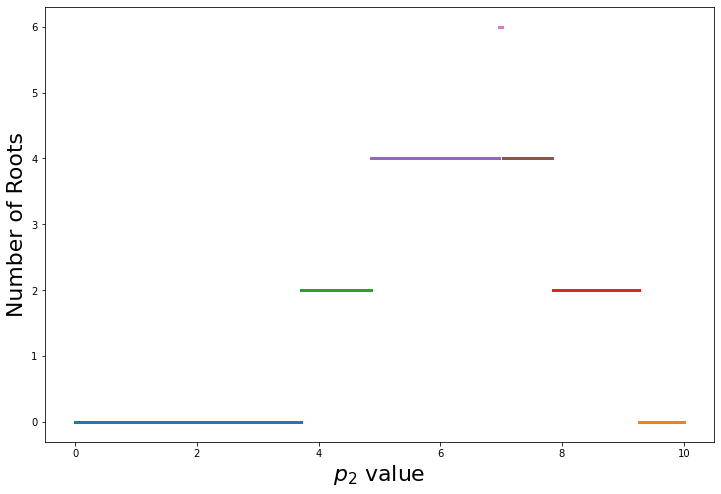

In [108]:
import seaborn as sns
list_root=[intervalZero, intervalTwo, intervalFour, intervalSix]
nrs=[0,2,4,6]

# Set up the figure for plotting
plt.figure(figsize=(12, 8))
    
for r,nr in zip(list_root,nrs):
    for i in r:
        sns.lineplot(x=np.linspace(i[0],i[1],10), y=[nr]*10, lw=3)
plt.xlabel('$p_2$ value', fontsize=22)
plt.ylabel('Number of Roots', fontsize=22)


## <a name="Section-4">4 References</a>
[top](#Contents)

1. Sauer, Tim. 2018. Numerical Analysis. N.p.: Pearson.<p>
2. Davies, Joseph. n.d. “Root-Finding Methods in Python. Bisection, Newton’s and Secant… | by Andrew Joseph Davies.” Finding the roots. Accessed October 20, 2022.<br>
https://towardsdatascience.com/root-finding-methods-from-scratch-in-python-84040c81a8ba.<p>
3. Reti, Daniel. 2021. “The Best Numerical Derivative Approximation Formulas | by Daniel Reti.” Cantor's Paradise.<br>
https://www.cantorsparadise.com/the-best-numerical-derivative-approximation-formulas-998703380948.<p>
4. “Numerical differentiation.” n.d. Wikipedia. Accessed October 20, 2022.<br>
https://en.wikipedia.org/wiki/Numerical_differentiation#/media/File:AbsoluteErrorNumericalDifferentiationExamp.<p>
5. “matplotlib.pyplot.plot — Matplotlib 3.6.0 documentation.” n.d. Matplotlib. Accessed October 20, 2022.<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html.<p>
6. “matplotlib.pyplot.scatter — Matplotlib 3.6.0 documentation.” n.d. Matplotlib. Accessed October 20, 2022.<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html.<p>
7. “ipywidgets interact.” n.d. IPyWidgets. Accessed October 20, 2022.<br>
https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html.<p>
8. “seaborn.lineplot — seaborn 0.12.1 documentation.” n.d. Seaborn. Accessed October 20, 2022.<br>
https://seaborn.pydata.org/generated/seaborn.lineplot.html.<p>